# Diabetes Prediction using Naive Bayes

# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import(
StandardScaler, MinMaxScaler, LabelEncoder
)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import(
accuracy_score, precision_score, recall_score,f1_score,
confusion_matrix, classification_report
)

# Loading Diabetes dataset into Pandas DataFrame

In [3]:
measures = pd.read_csv(r"C:\Users\ad min\Desktop\ML\ml\Final\diabetes.csv")

# Display Shape of the Dataset

In [4]:
print("Shape of the Dataset".center(50,'-'))
print("No. of Rows/Dimensions:",measures.shape[0])
print("No. of Columns/Features:",measures.shape[1])

---------------Shape of the Dataset---------------
No. of Rows/Dimensions: 995
No. of Columns/Features: 3


# Display Feature List

In [5]:
print("Feature Names".center(50,'-'))
for column in measures.columns:
    print(column)

------------------Feature Names-------------------
glucose
bloodpressure
diabetes


# Display First 5 Records

In [6]:
measures.head()

glucose  bloodpressure  diabetes
0       40             85         0
1       40             92         0
2       45             63         1
3       45             80         0
4       40             73         1

# Display Last 5 Records

In [7]:
measures.tail()

glucose  bloodpressure  diabetes
990       45             87         0
991       40             83         0
992       40             83         0
993       40             60         1
994       45             82         0

# Summerized Information

In [8]:
measures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


# Statistical Description

In [9]:
measures.describe()

glucose  bloodpressure    diabetes
count  995.000000     995.000000  995.000000
mean    44.306533      79.184925    0.500503
std      6.707567       9.340204    0.500251
min     20.000000      50.000000    0.000000
25%     40.000000      72.000000    0.000000
50%     45.000000      80.000000    1.000000
75%     50.000000      87.000000    1.000000
max     70.000000     100.000000    1.000000

# Data Preprocessing #1 Handling Duplicates

In [10]:
print("No. of Duplicate Records:",measures.duplicated().sum())

No. of Duplicate Records: 820


In [11]:
measures.drop_duplicates(inplace=True)

In [12]:
print("After Removing Duplication No. of Duplicate Records:",measures.duplicated().sum())

After Removing Duplication No. of Duplicate Records: 0


# Data Preprocessing #2 Handling Missing Values

In [13]:
print("Count of Missing Values".center(50,'-'))
measures.isnull().sum()

-------------Count of Missing Values--------------


glucose          0
bloodpressure    0
diabetes         0
dtype: int64

# Data Preprocessing #3 Handling Outliers

Boxplot to Detected Outliers in Glucose

Text(0.5, 1.0, 'Box Plot to detect outliers in Glucose feature')

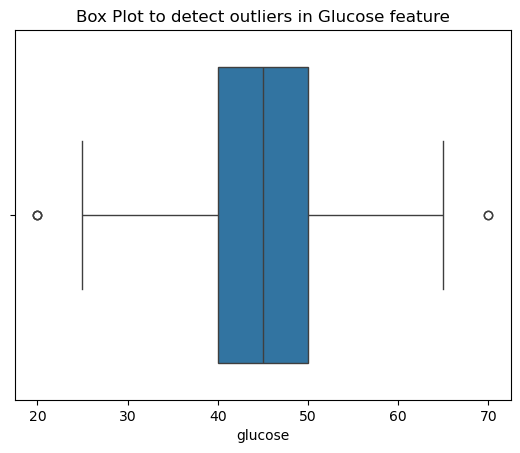

In [14]:
sb.boxplot(x=measures["glucose"])
plt.title("Box Plot to detect outliers in Glucose feature")

Text(0, 0.5, 'Glucose')

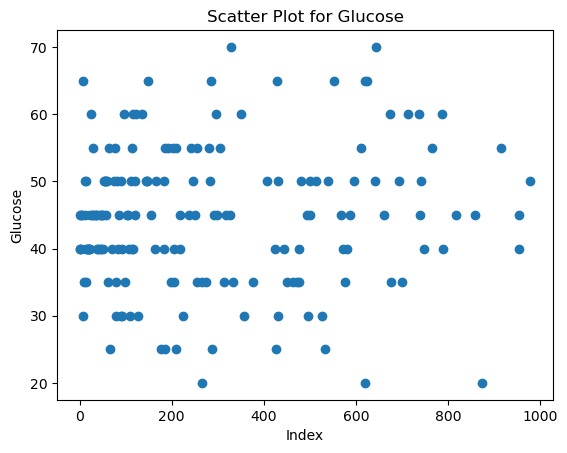

In [15]:
plt.scatter(measures.index,measures["glucose"])
plt.title("Scatter Plot for Glucose")
plt.xlabel("Index")
plt.ylabel("Glucose")

We have detected outliers in Glucose Feature

Text(0.5, 1.0, 'Box Plot to detect outliers in Blood Pressure feature')

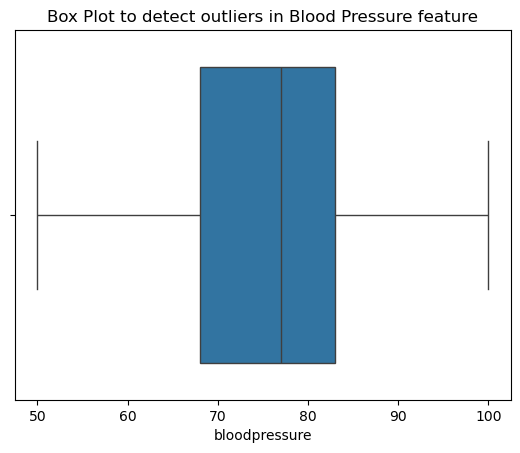

In [16]:
sb.boxplot(x=measures["bloodpressure"])
plt.title("Box Plot to detect outliers in Blood Pressure feature")

Text(0, 0.5, 'Blood Pressure')

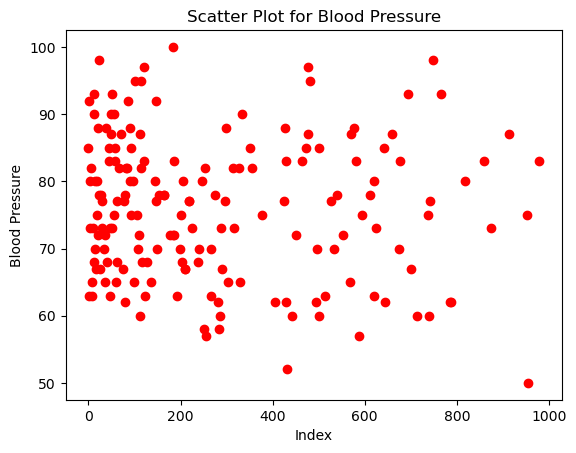

In [17]:
plt.scatter(measures.index,measures["bloodpressure"],color="red")
plt.title("Scatter Plot for Blood Pressure")
plt.xlabel("Index")
plt.ylabel("Blood Pressure")

We have not detected any outliers in Blood Pressure Feature

Removing or Capping Outliers

In [18]:
lower = measures["glucose"].quantile(0.25)
upper = measures["glucose"].quantile(0.75)

IQR = upper - lower

lower_iqr = lower - 1.5 * IQR
upper_iqr = upper + 1.5 * IQR

Displaying Dimensions with Outliers

In [19]:
#Lower Outliers
measures[(measures["glucose"]<lower_iqr)]

glucose  bloodpressure  diabetes
266       20             70         1
620       20             80         1
873       20             73         1

In [20]:
#Upper Outliers
measures[(measures["glucose"]>upper_iqr)]

glucose  bloodpressure  diabetes
329       70             65         1
643       70             62         1

In [21]:
measures = measures[(measures["glucose"]>lower_iqr) & (measures["glucose"] < upper_iqr)]

# Feature Enginnering - Feature Selection

In [22]:
#Splitting Data into Independent and Dependent Variables
x = pd.DataFrame(measures.iloc[:,0:2])
y = pd.DataFrame(measures.iloc[:,2])

# Plotting Data

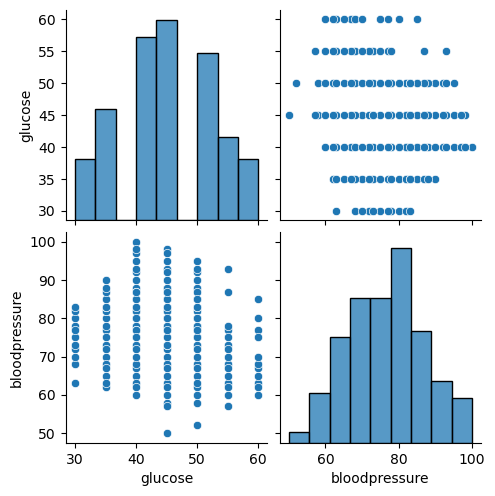

In [23]:
sb.pairplot(data=x)

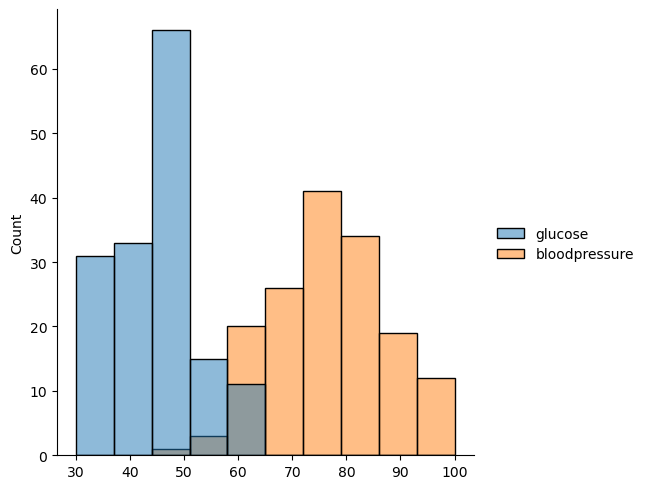

In [24]:
sb.displot(x)

# Scaling Data

In [26]:
scaler = MinMaxScaler()
x= scaler.fit_transform(x)
x = pd.DataFrame(x)

# Encoding Data

In [27]:
encoder = LabelEncoder()
y = pd.DataFrame(encoder.fit_transform(y))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Splitting into Training and Testing

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y)

# Model Creation

In [29]:
naivebayes_cls = GaussianNB()

# Training Model

In [30]:
naivebayes_cls.fit(xtrain,ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

# Predicting Output

In [31]:
ypred = naivebayes_cls.predict(xtest)

# Model Evaluation

In [32]:
print("Accuracy Score:",accuracy_score(ytest,ypred))
print("Precision Score:",precision_score(ytest,ypred,average='macro'))
print("recall Score:",recall_score(ytest,ypred,average='macro'))
print("f1 Score:",f1_score(ytest,ypred,average='macro'))

Accuracy Score: 0.8717948717948718
Precision Score: 0.8555194805194806
recall Score: 0.837962962962963
f1 Score: 0.8458498023715415


# Classification Report

In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.89      0.93      0.91        27

    accuracy                           0.87        39
   macro avg       0.86      0.84      0.85        39
weighted avg       0.87      0.87      0.87        39



# Deploying Model

In [43]:
glucose = int(input("Enter Glucose Value:"))
bloodpressure = int(input("Enter Blood Pressure Value:"))

Enter Glucose Value: 1
Enter Blood Pressure Value: 1


In [44]:
bayes_cls = GaussianNB()
bayes_cls.fit(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [45]:
ypred_cls = bayes_cls.predict([[glucose,bloodpressure]])
if(ypred_cls == 1):
    print("You Have Detected Diabetes Positive")
else:
    print("You Have Detected Diabetes Negative")

You Have Detected Diabetes Negative
